<strong><b><font size="5">Análise Estatística e Modelagem Preditiva de Séries Temporais - Em Python</font></b></strong>

<strong><b><font size="5">Prevendo a Média Mensal de Vendas - Modelo ARMA</font></b></strong>

**Modelos de Média Móvel Auto-Regressiva (ARMA - Auto Regressive Moving Average)**

O modelo ARMA é simplesmente a fusão entre os modelos AR (p) e MA (q).
 
Os modelos AR (p) tentam explicar o momento e os efeitos médios da reversão frequentemente observados nos mercados (efeitos dos participantes do mercado).

Os modelos MA (q) tentam capturar os efeitos de choque observados em termos de ruído branco. Estes efeitos de choque podem ser considerados eventos inesperados que afetam o processo de observação, p, como ganhos repentinos, guerras, ataques, etc.

O modelo ARMA tenta capturar esses dois aspectos ao modelar séries temporais. O modelo ARMA não leva em consideração o agrupamento de volatilidade, um fenômeno empírico essencial de muitas séries temporais financeiras que discutiremos mais adiante.

Modelo ARMA(1,1) é representado como:

x(t) = a*x(t-1) + b*e(t-1) + e(t)

Onde e(t) é o ruído branco com E [e(t)] = 0

Um modelo ARMA geralmente requer menos parâmetros que um modelo AR (p) ou um modelo MA (q) individual. Ou seja, é redundante em seus parâmetros.

Criaremos um modelo ARMA neste notebook.

In [1]:
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import numpy as np
import pandas as pd
from datetime import datetime

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m

# Imports para modelagem preditiva
import statsmodels
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.stats as sms
import scipy
import scipy.stats as scs
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.stats.stattools import jarque_bera

# Imports para métricas e performance do modelo
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

#%matplotlib inline

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

statsmodels     0.11.1
statsmodels.api 0.11.1
sklearn         0.23.1
pandas          1.0.5
scipy           1.4.1
numpy           1.16.6
matplotlib      3.3.0
Data Science Academy


## Definição do Problema de Negócio

Previsão de arrecadação de ICMS.

## Conjunto de Dados

Usaremos conjuntos de dados que mostram a arrecadação de ICMS. Os dados tem registros dos anos de 2010 a 2015.

Será fornecido 1 dataset com 2 colunas, data e arrecadação de icms. 

In [3]:
# Carrega os dados
dataframe = pd.read_csv("Arrecadacao_icms.csv")
dataframe['Data'] = pd.to_datetime(dataframe.Data, format = '%d/%m/%Y')
dataframe = dataframe.set_index('Data')

In [4]:
# Dados
dataframe.head()

,Arrecadacao
Data,
2010-01-01,3299311
2010-02-01,2415158
2010-03-01,2613292
2010-04-01,2533679
2010-05-01,2426702


In [5]:
# Refinamos os dados para o gráfico da série original

# A variável Count é nossa variável target (total de pessoas que usaram transporte)
target = dataframe['Arrecadacao']

In [6]:
# Random seed 
np.random.seed(7)

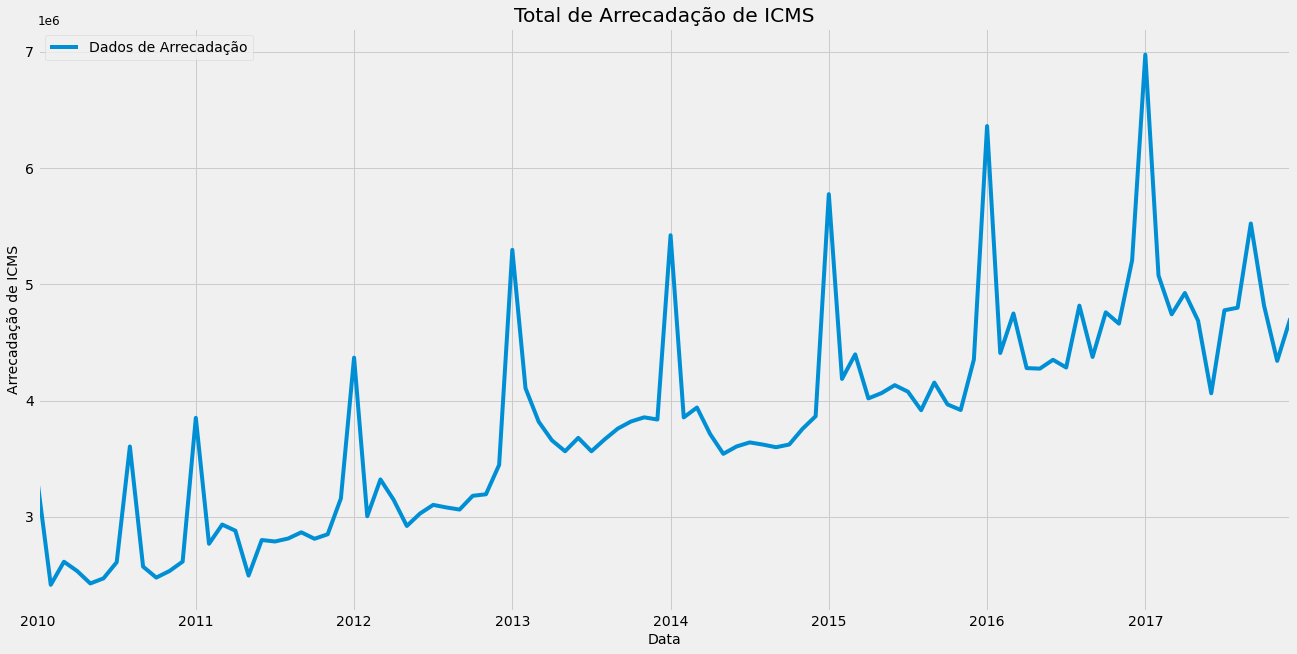

In [7]:
# Plot
target.plot(title = 'Total de Arrecadação de ICMS', fontsize = 14, label = 'Dados de Arrecadação') 
plt.xlabel("Data") 
plt.ylabel("Arrecadação de ICMS") 
plt.legend(loc = 'best') 
plt.show()

## Pré-Processamento

Podemos dividir os dados de treino e validação para treinar e validar a performance do modelo antes de usar os dados de teste.

In [8]:
# Divisão em treino e teste
treino_size = int(len(target) * 0.75)
treino, teste = target[0:treino_size], target[treino_size:]
print(len(treino), len(teste))

72 24


In [9]:
# Função Para o Cálculo da Acurácia
def performance(y_true, y_pred): 
    mse = ((y_pred - y_true) ** 2).mean()
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return( print('MSE das previsões é {}'.format(round(mse, 4))+
                  '\nRMSE das previsões é {}'.format(round(np.sqrt(mse), 4))+
                  '\nMAPE das previsões é {}'.format(round(mape, 4))))

## Modelo ARMA

Dada uma série temporal de dados Xt, o modelo ARMA é uma ferramenta para entender e, talvez, prever valores futuros nesta série. A parte AR envolve a regressão da variável com seus próprios valores defasados (isto é, passados). A parte MA envolve modelar o termo de erro como uma combinação linear de termos de erro que ocorrem contemporaneamente e em vários momentos no passado. O modelo é geralmente chamado de modelo ARMA (p, q), em que p é a ordem da parte AR e q é a ordem da parte MA.

https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMA.html

In [10]:
# Cria o modelo
modelo_arma = ARMA(treino, order = (12, 9))

C:\Users\Guto\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [13]:
# Treina o modelo
modelo_arma_fit = modelo_arma.fit(method = 'mle', disp = False)

C:\Users\Guto\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Guto\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [14]:
# Sumário do modelo
modelo_arma_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Arrecadacao   No. Observations:                   72
Model:                    ARMA(12, 9)   Log Likelihood                -999.243
Method:                           mle   S.D. of innovations         205929.267
Date:                Sat, 22 Aug 2020   AIC                           2044.486
Time:                        14:07:01   BIC                           2096.849
Sample:                    01-01-2010   HQIC                          2065.332
                         - 12-01-2015                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.469e+06   7.47e+05      4.647      0.000    2.01e+06    4.93e+06
ar.L1.Arrecadacao     -0.0101      0.079     -0.128      0.898      -0.166       0.146
ar.L2.Arrecadacao      0.0401      0.066      0.605      0.545      -0.090       0.170
ar.L3.Arrecadacao     -0.0899      0.063     -1.427      0.154      -0.213       0.034
ar.L4.Arrecadacao     -0.0008      0.063     -0.013      0.990      -0.125       0.123
ar.L5.Arrecadacao      0.1281      0.068      1.873      0.061      -0.006       0.262
ar.L6.Arrecadacao     -0.0086      0.066     -0.130      0.897      -0.139       0.121
ar.L7.Arrecadacao     -0.0003      0.067     -0.004      0.997      -0.132       0.132
ar.L8.Arrecadacao      0.0370      0.064      0.580      0.562      -0.088       0.162
ar.L9.Arrecadacao     -0.0258      0.063     -0.412      0.681      -0.149       0.097
ar.L10.Arrecadacao     0.0002      0.064      0.003      0.998      -0.124       0.125
ar.L11.Arrecadacao     0.0010      0.058      0.017      0.986      -0.113       0.115
ar.L12.Arrecadacao     0.8689      0.052     16.854      0.000       0.768       0.970
ma.L1.Arrecadacao      0.5915      0.200      2.954      0.003       0.199       0.984
ma.L2.Arrecadacao      0.4373      0.211      2.070      0.038       0.023       0.851
ma.L3.Arrecadacao      0.8428      0.226      3.736      0.000       0.401       1.285
ma.L4.Arrecadacao      0.7390      0.275      2.686      0.007       0.200       1.278
ma.L5.Arrecadacao      0.1524      0.209      0.730      0.466      -0.257       0.562
ma.L6.Arrecadacao      0.3585      0.187      1.921      0.055      -0.007       0.724
ma.L7.Arrecadacao      0.0286      0.187      0.153      0.879      -0.339       0.396
ma.L8.Arrecadacao      0.0761      0.236      0.323      0.747      -0.387       0.539
ma.L9.Arrecadacao      0.3445      0.209      1.647      0.100      -0.065       0.755
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0054           -0.0000j            1.0054           -0.0000
AR.2             0.8846           -0.5109j            1.0215           -0.0834
AR.3             0.8846           +0.5109j            1.0215            0.0834
AR.4             0.4959           -0.8687j            1.0003           -0.1674
AR.5             0.4959           +0.8687j            1.0003            0.1674
AR.6            -1.0060           -0.0000j            1.0060           -0.5000
AR.7            -0.8665           -0.4995j            1.0002           -0.4168
AR.8            -0.8665           +0.4995j            1.0002            0.4168
AR.9            -0.5299           -0.8852j            1.0316           -0.3359
AR.10           -0.5299           +0.88

> Observe a métrica AIC (Akaike Information Criterion). Esse valor deve ser o menor possível para uma boa performance do modelo.

In [15]:
# Previsões com o modelo
arma_predict = modelo_arma_fit.predict(start = pd.to_datetime('2016-01-01'), 
                                       end = pd.to_datetime('2017-12-01'),
                                       dynamic = False)

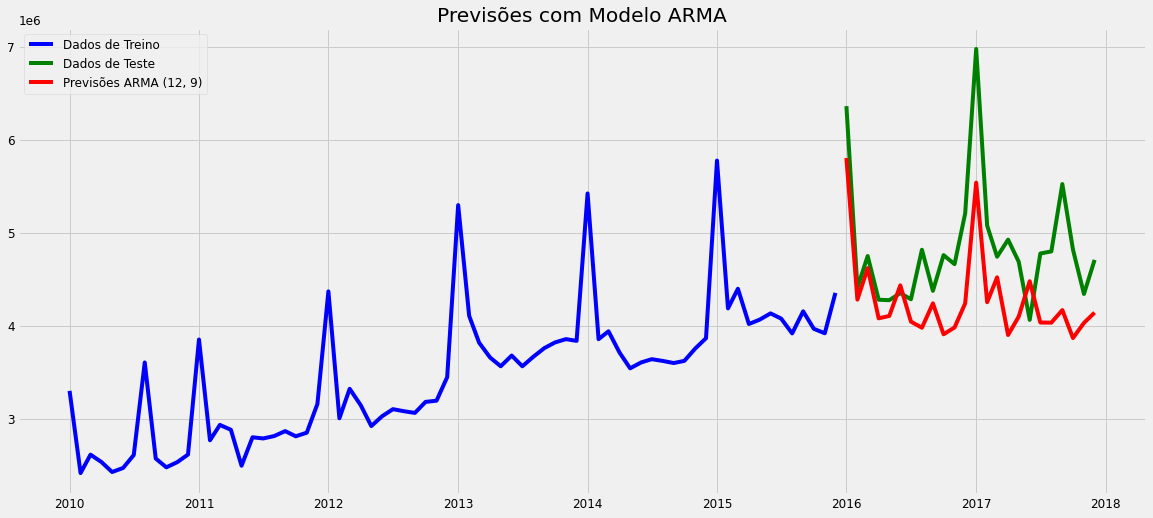

In [16]:
# Plot
rcParams['figure.figsize'] = 18, 8
plt.plot(treino, label = 'Dados de Treino', color = 'blue')
plt.plot(teste, label = 'Dados de Teste', color = 'green')
plt.plot(arma_predict, label = 'Previsões ARMA (12, 9)', color = 'red')
plt.title('Previsões com Modelo ARMA')
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

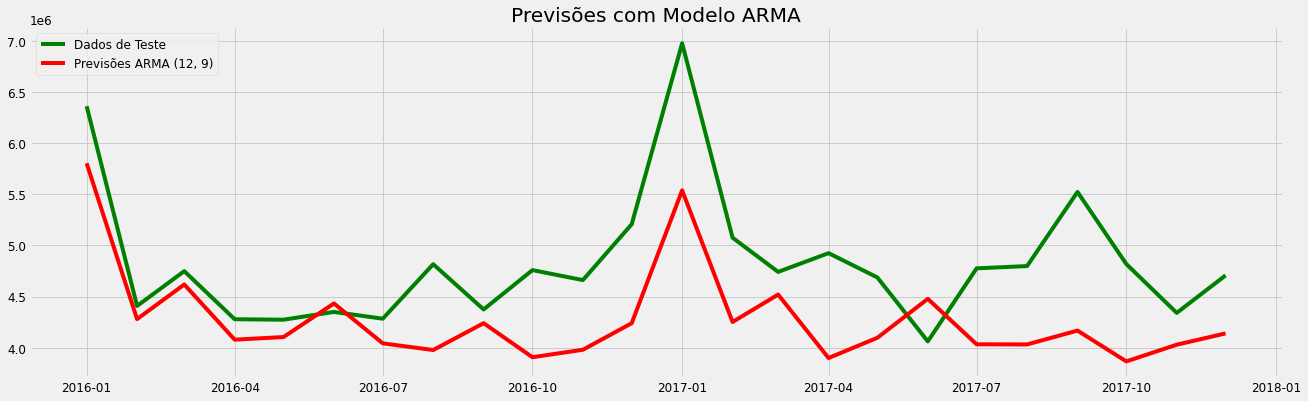

In [17]:
# Plot
plt.figure(figsize = (20, 6))
plt.plot(teste, label = 'Dados de Teste', color = 'green')
plt.plot(arma_predict, label = 'Previsões ARMA (12, 9)', color = 'red')
plt.title('Previsões com Modelo ARMA')
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

In [18]:
# Avaliando a performance com dados de teste 
arma_results = performance(teste, arma_predict)

MSE das previsões é 499022705266.4375
RMSE das previsões é 706415.3914
MAPE das previsões é 11.758


Vamos executar alguns diagnósticos para avaliar o modelo.

Começamos criando uma função com os Plots ACF e PACF, além dos resíduos.

In [19]:
# Função
def tsplot(y, lags = None, figsize = (12, 8), style = 'bmh'):
    
    # Se a série não for do tipo pd.Series, fazemos a conversão
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    
    # Criamos os plots
    with plt.style.context(style):    
        fig = plt.figure(figsize = figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan = 2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax = ts_ax)
        ts_ax.set_title('Plots Para Análise de Séries Temporais')
        smt.graphics.plot_acf(y, lags = lags, ax = acf_ax, alpha = 0.05)
        smt.graphics.plot_pacf(y, lags = lags, ax = pacf_ax, alpha = 0.05)
        sm.qqplot(y, line = 's', ax = qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams = (y.mean(), y.std()), plot = pp_ax)

        plt.tight_layout()
    return

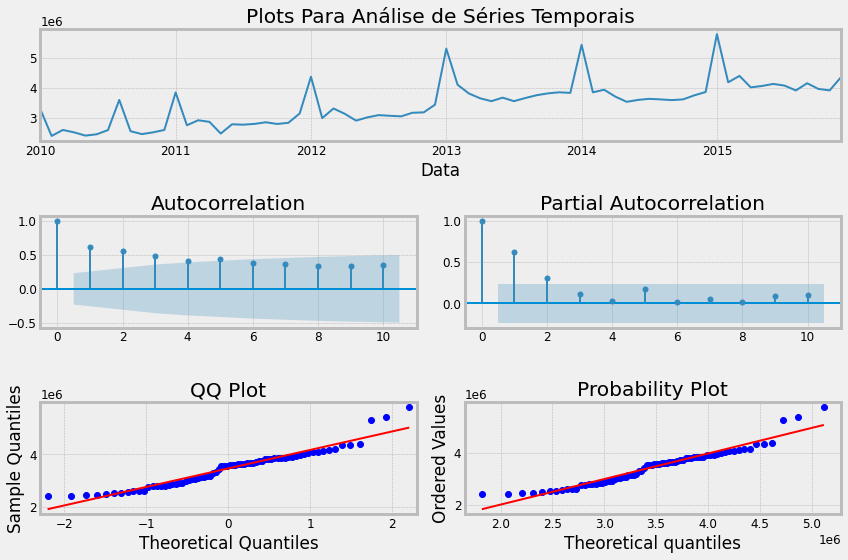

In [20]:
# Executa a função com dados de treino
tsplot(treino, lags = 10)

> Os resíduos do modelo devem ser normalmente distribuídos. Vamos checar com o teste jarque_bera.

In [22]:
# Teste
score, pvalue, _, _ = jarque_bera(modelo_arma_fit.resid)

# Resultado
if pvalue < 0.05:
    print ('\n pvalue = %.8f  -  Os resíduos podem não ser normalmente distribuídos.' % (pvalue))
else:
    print ('\n pvalue = %.8f  -  Os resíduos parecem normalmente distribuídos.' % (pvalue))


 pvalue = 0.00184589  -  Os resíduos podem não ser normalmente distribuídos.


In [23]:
# Teste de Ljung-Box
resultado_teste = sms.diagnostic.acorr_ljungbox(modelo_arma_fit.resid, lags = [30], boxpierce = False)
print('Valor-p =', resultado_teste[1])

Valor-p = [0.81573753]


Observe que o valor-p é maior que 0,05, o que indica que os resíduos são independentes no nível de 95% e, portanto, um modelo ARMA (12,9) fornece um bom ajuste do modelo.

Ajustes dos valores de p e q

Para ajustar os dados a um modelo ARMA, usamos o Akaike Information Criterion (AIC) em um subconjunto de valores para p, q para encontrar o modelo com o mínimo AIC e, em seguida, aplicamos o teste de Ljung-Box para determinar se um bom ajuste foi alcançado para valores particulares de p, q. Se o valor-p do teste for maior que a significância requerida, podemos concluir que os resíduos são independentes e ruído branco.

In [24]:
# Vamos tentar encontrar os melhores valores de p e q
# O AIC deve ser o menor possível

warnings.simplefilter("ignore")

# Valores iniciais
melhor_aic = np.inf 
melhor_order = None
melhor_modelo = None

# Valores para testar a melhor combinação order = (i, j)
valores_para_order = [1, 2, 3, 4, 5]

# Loop
for i in valores_para_order:
    for j in valores_para_order:
        try:
            tmp_mdl = ARMA(treino, order = (i, j)).fit(disp = False)
            tmp_aic = tmp_mdl.aic
            if tmp_aic < melhor_aic:
                melhor_aic = tmp_aic
                melhor_order = (i, j)
                melhor_modelo = tmp_mdl
        except: continue

# Print
print('\nMelhor Valor de AIC: %6.2f | order: %s'%(melhor_aic, melhor_order))
print('\nMelhor Modelo:', melhor_modelo.summary())


Melhor Valor de AIC: 2101.82 | order: (5, 5)

Melhor Modelo:                               ARMA Model Results                              
Dep. Variable:            Arrecadacao   No. Observations:                   72
Model:                     ARMA(5, 5)   Log Likelihood               -1038.912
Method:                       css-mle   S.D. of innovations         415148.088
Date:                Sat, 22 Aug 2020   AIC                           2101.824
Time:                        14:09:41   BIC                           2129.144
Sample:                    01-01-2010   HQIC                          2112.700
                         - 12-01-2015                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.469e+06   3.78e+05      9.168      0.000    2.73e+06    4.21e+06
ar.L1.Arrecadacao     0.2045      0.025      8.0

Opa! Aumentou o erro do nosso modelo. 

RMSE:

_ modelo 11____modelo 12____modelo 13____modelo 14____modelo 15

_805471.0878__750397.7727____767631.9506____694827.8110___706415.3914

As mensagens de warning acima indicam que para algumas combinações de order (i, j) o modelo não consegue nem mesmo convergir. Por fim, a melhor combinação foi a que escolhemos no início e que apresenta a melhor performance: order: (5, 5).

Será que conseguimos fazer melhor do que isso? Você não vi nada ainda! Além do Modelo ARMA, confira os modelos que vamos criar nas próximas aulas:

- Modelo ARIMA
- Modelo SARIMA
- Modelo Triple Exponential Smoothing

- Modelo LSTM (Deep Learning)
- Modelo Stacked LSTM (Deep Learning)
- Modelo Bidirectional LSTM (Deep Learning)
- Modelo Convolutional Neural Network (Deep Learning)

Estudaremos ainda como usar Grid Search para encontrar os melhores valores dos parâmetros p, d e q.

Todas as aulas deste curso podem ser encontradas na timeline da Comunidade no portal da DSA: www.datascienceacademy.com.br

# Fim